In [5]:
from ticketmaster_key import api_key
import requests
import matplotlib.pyplot as plt

In [75]:
# Ticketmaster API endpoint and parameters
url = 'https://app.ticketmaster.com/discovery/v2/events.json'
params = {
    'apikey': api_key,
    'countryCode': 'US',
    'size': 200,
    'segmentId': 'KZFzniwnSyZfZ7v7nJ'
}

# Requesting data from Ticketmaster API
response = requests.get(url, params=params)

In [76]:
# Extracting name and date for each event. Extracting name, city, and state for each venue
if response.status_code == 200:
    data = response.json()
    
    events = data['_embedded']['events']
    for event in events:
        event_name = event['name']
        event_date = event['dates']['start']['localDate']
        
        venues = event['_embedded']['venues']
        for venue_data in venues:
            venue_name = venue_data['name']
            venue_city = venue_data['city']['name']
            venue_state = venue_data['state']['name']
            venue_location = f"{venue_city}, {venue_state}"
 
        
            print(f"Event: {event_name}")
            print(f"Date: {event_date}")
            print(f"Venue: {venue_name}") 
            print(f"Location: {venue_location}\n")
            
            venue_counts[venue_name] = venue_counts.get(venue_name, 0) + 1
        
else:
    print("Failed to fetch data")  

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-16
Venue: Sphere
Location: Las Vegas, Nevada

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-01
Venue: Sphere
Location: Las Vegas, Nevada

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-02
Venue: Sphere
Location: Las Vegas, Nevada

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-13
Venue: Sphere
Location: Las Vegas, Nevada

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-15
Venue: Sphere
Location: Las Vegas, Nevada

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-06
Venue: Sphere
Location: Las Vegas, Nevada

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-09
Venue: Sphere
Location: Las Vegas, Nevada

Event: U2:UV Achtung Baby Live At Sphere - General Admission Floor
Date: 2023-12-08
Venue: Sphere
Location: Las

In [77]:
# Printing the top 10 popular venues based on venue count
num_venues = 10  
print(f"Top {num_venues} Most Popular Venues:")
for venue, count in sorted_venues[:num_venues]:
    print(f"{venue}: {count} events")

Top 10 Most Popular Venues:
Lambeau Field: 152 events
Sphere: 140 events
Bakkt Theater at Planet Hollywood: 72 events
Footprint Center: 43 events
Kia Forum: 27 events
Smoothie King Center: 10 events
United Center: 10 events
MetLife Stadium: 9 events
Lincoln Financial Field: 7 events
SoFi Stadium: 7 events


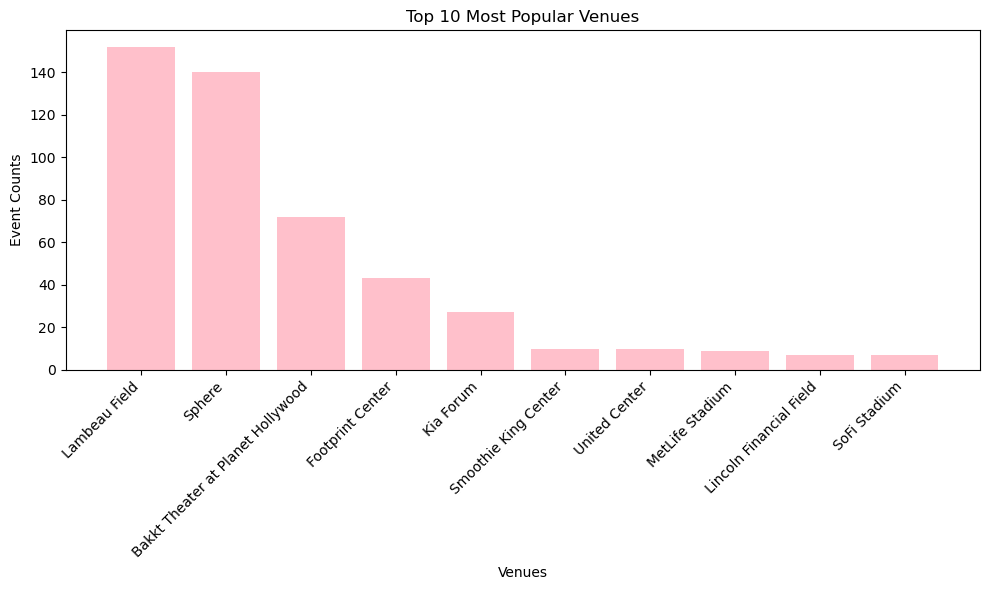

In [78]:
# Displaying bar graph for top 10 venues and their counts
top_venues = sorted_venues[:num_venues]
venues, counts = zip(*top_venues)  

plt.figure(figsize=(10, 6))
plt.bar(venues, counts, color='pink') 
plt.xlabel('Venues')
plt.ylabel('Event Counts')
plt.title('Top 10 Most Popular Venues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
